In [1]:
import pandas as pd
import numpy as np
from functools import reduce
from functionspipe import *
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import requests

## Importando Datos y Dataframe.

In [2]:
files = ['Data/content.csv', 'Data/genres.csv', 'Data/labels.csv', 'Data/reviews.csv', 'Data/years.csv']

### Importamos los archivos .csv a través de la función *df_frames*.

In [3]:
print(df_frames(files))

[       reviewid                                            content
0         22703  “Trip-hop” eventually became a ’90s punchline,...
1         22721  Eight years, five albums, and two EPs in, the ...
2         22659  Minneapolis’ Uranium Club seem to revel in bei...
3         22661  Kleenex began with a crash. It transpired one ...
4         22725  It is impossible to consider a given release b...
5         22722  In the pilot episode of “Insecure,” the critic...
6         22704  Rapper Simbi Ajikawo, who records as Little Si...
7         22694  For the last thirty years, Israel’s electronic...
8         22714  Ambient music is a funny thing. As innocuous a...
9         22724  There were innumerable cameos at the Bad Boy F...
10        22715  Lots of drone musicians have been called sound...
11        22745  On 2006’s “That’s Life,” Killer Mike boasted “...
12        22700  “Why so sad?/Don’t feel so bad/Get out of bed,...
13        22720  In January 2016, rapper/actor Yasiin Bey ann

Merge de csv en un único Dataframe.

In [4]:
df = reduce(lambda x,y: pd.merge(x,y, on='reviewid', how='outer'), [df_frames(files)[0], df_frames(files)[1], df_frames(files)[2], df_frames(files)[3], df_frames(files)[4]])

In [5]:
df.head(10)

,reviewid,content,genre,label,title,artist,url,score,best_new_music,author,author_type,pub_date,pub_weekday,pub_day,pub_month,pub_year,year
0,22703,"“Trip-hop” eventually became a ’90s punchline,...",electronic,virgin,mezzanine,massive attack,http://pitchfork.com/reviews/albums/22703-mezz...,9.3,0,nate patrin,contributor,2017-01-08,6,8,1,2017,1998.0
1,22721,"Eight years, five albums, and two EPs in, the ...",metal,hathenter,prelapsarian,krallice,http://pitchfork.com/reviews/albums/22721-prel...,7.9,0,zoe camp,contributor,2017-01-07,5,7,1,2017,2016.0
2,22659,Minneapolis’ Uranium Club seem to revel in bei...,rock,static shock,all of them naturals,uranium club,http://pitchfork.com/reviews/albums/22659-all-...,7.3,0,david glickman,contributor,2017-01-07,5,7,1,2017,2016.0
3,22659,Minneapolis’ Uranium Club seem to revel in bei...,rock,fashionable idiots,all of them naturals,uranium club,http://pitchfork.com/reviews/albums/22659-all-...,7.3,0,david glickman,contributor,2017-01-07,5,7,1,2017,2016.0
4,22661,Kleenex began with a crash. It transpired one ...,rock,kill rock stars,first songs,"kleenex, liliput",http://pitchfork.com/reviews/albums/22661-firs...,9.0,1,jenn pelly,associate reviews editor,2017-01-06,4,6,1,2017,2016.0
5,22661,Kleenex began with a crash. It transpired one ...,rock,mississippi,first songs,"kleenex, liliput",http://pitchfork.com/reviews/albums/22661-firs...,9.0,1,jenn pelly,associate reviews editor,2017-01-06,4,6,1,2017,2016.0
6,22725,It is impossible to consider a given release b...,electronic,teklife,new start,taso,http://pitchfork.com/reviews/albums/22725-new-...,8.1,0,kevin lozano,tracks coordinator,2017-01-06,4,6,1,2017,2016.0
7,22722,"In the pilot episode of “Insecure,” the critic...",NaN,rca,insecure (music from the hbo original series),various artists,http://pitchfork.com/reviews/albums/22722-inse...,7.4,0,vanessa okoth-obbo,contributor,2017-01-05,3,5,1,2017,2016.0
8,22704,"Rapper Simbi Ajikawo, who records as Little Si...",rap,age 101,stillness in wonderland,little simz,http://pitchfork.com/reviews/albums/22704-litt...,7.1,0,katherine st. asaph,contributor,2017-01-05,3,5,1,2017,2016.0
9,22694,"For the last thirty years, Israel’s electronic...",electronic,stroboscopic artefacts,tehillim,yotam avni,http://pitchfork.com/reviews/albums/22694-tehi...,7.0,0,andy beta,contributor,2017-01-05,3,5,1,2017,2016.0


## Trabajamos con el Dataframe y limpieza de datos.

In [6]:
df.shape

(26018, 17)

In [7]:
cols = df.columns.tolist()
cols

['reviewid',
 'content',
 'genre',
 'label',
 'title',
 'artist',
 'url',
 'score',
 'best_new_music',
 'author',
 'author_type',
 'pub_date',
 'pub_weekday',
 'pub_day',
 'pub_month',
 'pub_year',
 'year']

Analizamos si hay columnas nulas y si es así eliminamos las de mayor valor de números nulos.

In [8]:
null_cols = df.isnull().sum()
null_cols[null_cols>0]

content          14
genre          2701
label            53
title             4
artist            2
author_type    5678
year            592
dtype: int64

In [9]:
drop_cols = list(null_cols[null_cols > 5000].index)
data = df.drop(drop_cols, axis=1)

In [10]:
data.head(10)

,reviewid,content,genre,label,title,artist,url,score,best_new_music,author,pub_date,pub_weekday,pub_day,pub_month,pub_year,year
0,22703,"“Trip-hop” eventually became a ’90s punchline,...",electronic,virgin,mezzanine,massive attack,http://pitchfork.com/reviews/albums/22703-mezz...,9.3,0,nate patrin,2017-01-08,6,8,1,2017,1998.0
1,22721,"Eight years, five albums, and two EPs in, the ...",metal,hathenter,prelapsarian,krallice,http://pitchfork.com/reviews/albums/22721-prel...,7.9,0,zoe camp,2017-01-07,5,7,1,2017,2016.0
2,22659,Minneapolis’ Uranium Club seem to revel in bei...,rock,static shock,all of them naturals,uranium club,http://pitchfork.com/reviews/albums/22659-all-...,7.3,0,david glickman,2017-01-07,5,7,1,2017,2016.0
3,22659,Minneapolis’ Uranium Club seem to revel in bei...,rock,fashionable idiots,all of them naturals,uranium club,http://pitchfork.com/reviews/albums/22659-all-...,7.3,0,david glickman,2017-01-07,5,7,1,2017,2016.0
4,22661,Kleenex began with a crash. It transpired one ...,rock,kill rock stars,first songs,"kleenex, liliput",http://pitchfork.com/reviews/albums/22661-firs...,9.0,1,jenn pelly,2017-01-06,4,6,1,2017,2016.0
5,22661,Kleenex began with a crash. It transpired one ...,rock,mississippi,first songs,"kleenex, liliput",http://pitchfork.com/reviews/albums/22661-firs...,9.0,1,jenn pelly,2017-01-06,4,6,1,2017,2016.0
6,22725,It is impossible to consider a given release b...,electronic,teklife,new start,taso,http://pitchfork.com/reviews/albums/22725-new-...,8.1,0,kevin lozano,2017-01-06,4,6,1,2017,2016.0
7,22722,"In the pilot episode of “Insecure,” the critic...",NaN,rca,insecure (music from the hbo original series),various artists,http://pitchfork.com/reviews/albums/22722-inse...,7.4,0,vanessa okoth-obbo,2017-01-05,3,5,1,2017,2016.0
8,22704,"Rapper Simbi Ajikawo, who records as Little Si...",rap,age 101,stillness in wonderland,little simz,http://pitchfork.com/reviews/albums/22704-litt...,7.1,0,katherine st. asaph,2017-01-05,3,5,1,2017,2016.0
9,22694,"For the last thirty years, Israel’s electronic...",electronic,stroboscopic artefacts,tehillim,yotam avni,http://pitchfork.com/reviews/albums/22694-tehi...,7.0,0,andy beta,2017-01-05,3,5,1,2017,2016.0


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26018 entries, 0 to 26017
Data columns (total 16 columns):
reviewid          26018 non-null int64
content           26004 non-null object
genre             23317 non-null object
label             25965 non-null object
title             26014 non-null object
artist            26016 non-null object
url               26018 non-null object
score             26018 non-null float64
best_new_music    26018 non-null int64
author            26018 non-null object
pub_date          26018 non-null object
pub_weekday       26018 non-null int64
pub_day           26018 non-null int64
pub_month         26018 non-null int64
pub_year          26018 non-null int64
year              25426 non-null float64
dtypes: float64(2), int64(6), object(8)
memory usage: 3.4+ MB


Eliminamos columnas que no nos interesan.

In [12]:
before = len(data.columns)
select_columns = ['content', 'label', 'url', 'best_new_music', 'author', 'pub_date', 'pub_weekday', 'pub_day', 'pub_month', 'pub_year']

dframe = data.drop(select_columns, axis=1)
after = len(dframe.columns)
print('Número de columnas finales: ', after)

Número de columnas finales:  6


In [13]:
dframe.head(20)

,reviewid,genre,title,artist,score,year
0,22703,electronic,mezzanine,massive attack,9.3,1998.0
1,22721,metal,prelapsarian,krallice,7.9,2016.0
2,22659,rock,all of them naturals,uranium club,7.3,2016.0
3,22659,rock,all of them naturals,uranium club,7.3,2016.0
4,22661,rock,first songs,"kleenex, liliput",9.0,2016.0
5,22661,rock,first songs,"kleenex, liliput",9.0,2016.0
6,22725,electronic,new start,taso,8.1,2016.0
7,22722,NaN,insecure (music from the hbo original series),various artists,7.4,2016.0
8,22704,rap,stillness in wonderland,little simz,7.1,2016.0
9,22694,electronic,tehillim,yotam avni,7.0,2016.0


Eliminamos los datos duplicados.

In [14]:
select_columns = ['reviewid', 'genre', 'title', 'artist', 'score', 'year']
dframe = dframe[select_columns].drop_duplicates()
after = len(dframe)
print('Number of duplicate records dropped: ', str(before - after))

Number of duplicate records dropped:  -23542


In [15]:
dframe.head(20)

,reviewid,genre,title,artist,score,year
0,22703,electronic,mezzanine,massive attack,9.3,1998.0
1,22721,metal,prelapsarian,krallice,7.9,2016.0
2,22659,rock,all of them naturals,uranium club,7.3,2016.0
4,22661,rock,first songs,"kleenex, liliput",9.0,2016.0
6,22725,electronic,new start,taso,8.1,2016.0
7,22722,NaN,insecure (music from the hbo original series),various artists,7.4,2016.0
8,22704,rap,stillness in wonderland,little simz,7.1,2016.0
9,22694,electronic,tehillim,yotam avni,7.0,2016.0
10,22714,experimental,reflection,brian eno,7.7,2017.0
11,22724,rap,filthy america its beautiful,the lox,5.3,2016.0


Renombramos la columna *title* y ordenamos el dataset.

In [16]:
dframe = dframe.rename(columns={'title':'album'})
dframe.columns

Index(['reviewid', 'genre', 'album', 'artist', 'score', 'year'], dtype='object')

In [17]:
column_order = ['reviewid', 'artist', 'album', 'year', 'genre', 'score']
dframe = dframe[column_order]
dframe.head(10)

,reviewid,artist,album,year,genre,score
0,22703,massive attack,mezzanine,1998.0,electronic,9.3
1,22721,krallice,prelapsarian,2016.0,metal,7.9
2,22659,uranium club,all of them naturals,2016.0,rock,7.3
4,22661,"kleenex, liliput",first songs,2016.0,rock,9.0
6,22725,taso,new start,2016.0,electronic,8.1
7,22722,various artists,insecure (music from the hbo original series),2016.0,NaN,7.4
8,22704,little simz,stillness in wonderland,2016.0,rap,7.1
9,22694,yotam avni,tehillim,2016.0,electronic,7.0
10,22714,brian eno,reflection,2017.0,experimental,7.7
11,22724,the lox,filthy america its beautiful,2016.0,rap,5.3


### Con la variable **year**, asignamos los valores nulos a 0 y transformamos la variable a una variable tipo: int64 para eliminar los float.

In [18]:
dframe['year'] = dframe['year'].fillna(0)

In [19]:
print(set(dframe['year']))

{0.0, 1959.0, 1960.0, 1962.0, 1963.0, 1964.0, 1965.0, 1966.0, 1967.0, 1968.0, 1969.0, 1970.0, 1971.0, 1972.0, 1973.0, 1974.0, 1975.0, 1976.0, 1977.0, 1978.0, 1979.0, 1980.0, 1981.0, 1982.0, 1983.0, 1984.0, 1985.0, 1986.0, 1987.0, 1988.0, 1989.0, 1990.0, 1991.0, 1992.0, 1993.0, 1994.0, 1995.0, 1996.0, 1997.0, 1998.0, 1999.0, 2000.0, 2001.0, 2002.0, 2003.0, 2004.0, 2005.0, 2006.0, 2007.0, 2008.0, 2009.0, 2010.0, 2011.0, 2012.0, 2013.0, 2014.0, 2015.0, 2016.0, 2017.0}


In [20]:
dframe['year'] = dframe['year'].astype('int64')
dframe['year'].dtype

dtype('int64')

In [21]:
print(set(dframe['year']))

{0, 1959, 1960, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017}


In [22]:
dframe[('year')].value_counts()

2007    1608
2005    1570
2008    1544
2006    1502
2010    1486
2011    1465
2009    1435
2012    1411
2013    1409
2004    1360
2003    1341
2016    1313
2014    1303
2002    1212
2015    1180
2001     720
0        524
2000     278
1999     158
1980      43
1996      41
1981      35
1977      33
1994      33
1971      33
1979      31
1992      29
1982      27
1997      25
1998      25
1985      24
1990      24
1993      23
1991      22
1970      21
1995      21
1968      20
1983      19
1988      18
1969      17
1989      17
1972      16
1987      15
1973      15
1975      14
1984      13
1974      12
1978      12
1976      12
1966       9
1986       9
1965       7
1967       7
1964       6
1963       3
1962       3
1960       3
2017       1
1959       1
Name: year, dtype: int64

Eliminamos valores de year nulos.

In [23]:
dframe = dframe[dframe.year != 0]

In [24]:
dframe.head(10)

,reviewid,artist,album,year,genre,score
0,22703,massive attack,mezzanine,1998,electronic,9.3
1,22721,krallice,prelapsarian,2016,metal,7.9
2,22659,uranium club,all of them naturals,2016,rock,7.3
4,22661,"kleenex, liliput",first songs,2016,rock,9.0
6,22725,taso,new start,2016,electronic,8.1
7,22722,various artists,insecure (music from the hbo original series),2016,NaN,7.4
8,22704,little simz,stillness in wonderland,2016,rap,7.1
9,22694,yotam avni,tehillim,2016,electronic,7.0
10,22714,brian eno,reflection,2017,experimental,7.7
11,22724,the lox,filthy america its beautiful,2016,rap,5.3


### Con la variable genre hacemos lo mismo, asignamos los valores nulos a 0 y los eliminamos del dataframe.

In [25]:
dframe['genre'] = dframe['genre'].fillna(0)

In [26]:
dframe[('genre')].value_counts()

rock            9631
electronic      3875
0               2394
experimental    1880
rap             1578
pop/r&b         1437
metal            875
folk/country     700
jazz             437
global           227
Name: genre, dtype: int64

In [27]:
dframe = dframe[dframe.genre != 0]

In [28]:
dframe.head(20)

,reviewid,artist,album,year,genre,score
0,22703,massive attack,mezzanine,1998,electronic,9.3
1,22721,krallice,prelapsarian,2016,metal,7.9
2,22659,uranium club,all of them naturals,2016,rock,7.3
4,22661,"kleenex, liliput",first songs,2016,rock,9.0
6,22725,taso,new start,2016,electronic,8.1
8,22704,little simz,stillness in wonderland,2016,rap,7.1
9,22694,yotam avni,tehillim,2016,electronic,7.0
10,22714,brian eno,reflection,2017,experimental,7.7
11,22724,the lox,filthy america its beautiful,2016,rap,5.3
12,22715,harry bertoia,clear sounds/perfetta,2016,experimental,8.0


In [29]:
null_cols = dframe.isnull().sum()
null_cols[null_cols>0]

album    1
dtype: int64

In [30]:
dframe[('album')].value_counts()

dj-kicks                                          25
ii                                                18
iii                                               12
live                                               9
m83                                                8
movie!                                             8
trouble                                            8
greatest hits                                      8
split ep                                           8
fourth world vol. 1: possible musics               8
cluster & eno                                      8
cluster 71                                         8
v                                                  8
the singles                                        7
play                                               7
dj kicks                                           7
r.i.p.                                             6
kalte sterne: early recordings                     6
the second annual report of throbbing gristle 

In [31]:
dframe['album'] = dframe['album'].fillna(0)
dframe = dframe[dframe.album != 0]

In [32]:
dframe.head(20)

,reviewid,artist,album,year,genre,score
0,22703,massive attack,mezzanine,1998,electronic,9.3
1,22721,krallice,prelapsarian,2016,metal,7.9
2,22659,uranium club,all of them naturals,2016,rock,7.3
4,22661,"kleenex, liliput",first songs,2016,rock,9.0
6,22725,taso,new start,2016,electronic,8.1
8,22704,little simz,stillness in wonderland,2016,rap,7.1
9,22694,yotam avni,tehillim,2016,electronic,7.0
10,22714,brian eno,reflection,2017,experimental,7.7
11,22724,the lox,filthy america its beautiful,2016,rap,5.3
12,22715,harry bertoia,clear sounds/perfetta,2016,experimental,8.0


### Hacemos lo mismo con la variable album y, al comprobar que ahora hay valores duplicados tanto en reviewid, artist y album, los eliminamos y nos quedamos con el primero.
Seguidamente ordenamos el dataset de manera ascendente en función de la columna **score**.

In [33]:
sel_col = ['reviewid', 'artist', 'album']
df_dupl = dframe.drop_duplicates(sel_col, keep='first')

In [34]:
df_final = df_dupl.sort_values('score', ascending=False)
df_final.head(20)

,reviewid,artist,album,year,genre,score
6153,17497,nas,illmatic,1994,rap,10.0
264,22485,bob dylan,blood on the tracks,1975,rock,10.0
11758,13433,the beatles,rubber soul,1965,rock,10.0
11752,13431,the beatles,abbey road,1969,rock,10.0
11748,13432,the beatles,the beatles,1968,rock,10.0
11742,13449,the stone roses,the stone roses,2009,rock,10.0
13977,11376,otis redding,otis blue: otis redding sings soul [collector'...,1965,pop/r&b,10.0
253,22374,public image ltd,metal box,1979,rock,10.0
5004,18517,nirvana,in utero: 20th anniversary edition,1993,rock,10.0
20531,1490,the clash,london calling: 25th anniversary legacy edition,2004,rock,10.0


### Hacemos los bins de score para representarlos gráficamente.

Pésimo: Notas de 0 a 3.

Flojo: Notas de 3 a 5.

Para fans: Notas de 5 a 6.

Recomendado: Notas de 6 a 8.

Muy bueno: Notas de 8 a 9.

Obra maestra: Notas 9/10.

In [35]:
score = df_final['score']
bins = (0, 3, 5, 6, 8, 9, 10)
labels = ('Pésimo', 'Flojo', 'Para fans', 'Recomendado', 'Muy bueno', 'Obra maestra')
groups = pd.cut(score, bins=bins, labels=labels)

scores = groups.value_counts(sort=False)
scores

Pésimo            232
Flojo            1009
Para fans        1719
Recomendado     10124
Muy bueno        2223
Obra maestra      346
Name: score, dtype: int64

### Filtramos el dataset a sólo los elementos con nota de #10.

In [36]:
dfx = df_final
dfx.head(10)

,reviewid,artist,album,year,genre,score
6153,17497,nas,illmatic,1994,rap,10.0
264,22485,bob dylan,blood on the tracks,1975,rock,10.0
11758,13433,the beatles,rubber soul,1965,rock,10.0
11752,13431,the beatles,abbey road,1969,rock,10.0
11748,13432,the beatles,the beatles,1968,rock,10.0
11742,13449,the stone roses,the stone roses,2009,rock,10.0
13977,11376,otis redding,otis blue: otis redding sings soul [collector'...,1965,pop/r&b,10.0
253,22374,public image ltd,metal box,1979,rock,10.0
5004,18517,nirvana,in utero: 20th anniversary edition,1993,rock,10.0
20531,1490,the clash,london calling: 25th anniversary legacy edition,2004,rock,10.0


In [37]:
def filter_score(dfx): 
    dfx = dfx[dfx['score'] == 10.0]
    return dfx
df_top = filter_score(df_final)

Imprimimos los diferentes estilos de música que abarcan los álbumes con mayor nota y con *.shape* mostramos el número de elementos.

In [38]:
loved_genres = df_top.genre.value_counts()
loved_genres

rock            51
rap              7
pop/r&b          6
electronic       3
jazz             3
experimental     2
folk/country     1
Name: genre, dtype: int64

In [39]:
df_top.shape

(73, 6)

## Añadimos la API.

Usamos la función *apireq* en la cual tenemos la dirección de la api y el apiKey para obtener el resultado que nos da la api en relación al album en concreto y así obtener el número de **oyentes** del mismo.

In [40]:
artist = list(df_top['artist'])
album = list(df_top['album'])

In [41]:
def apireq(artist, album):
    key = open(".env").read()
    url = 'http://ws.audioscrobbler.com/2.0/?method=album.getinfo'
    response = requests.get(url+"&api_key={}&artist={}&album={}&format=json".format(key, artist, album))
    res = response.json()
    return res

listeners = []
for i in range(len(album)):
    answer = apireq(artist[i], album[i])
    try:
        listeners.append(answer['album']['listeners'])
        #print(answer['album']['listeners'])
    except:
        listeners.append('no data')
        #print(answer, 'Este artista no tiene el álbum en last.fm')

listeners

['733628',
 '402705',
 '690382',
 '1049290',
 '350469',
 '723086',
 '174723',
 'no data',
 '97',
 '404',
 '30379',
 '648276',
 '30457',
 '497022',
 '871752',
 '9518',
 '382475',
 '11',
 '776827',
 '831013',
 '664285',
 '329620',
 '6988',
 '138',
 '218405',
 '223',
 '464800',
 '596527',
 '0',
 '355677',
 '6',
 '306313',
 '187665',
 '110610',
 '286280',
 '4',
 'no data',
 'no data',
 '284607',
 '4131',
 '186927',
 '533819',
 '313',
 '75000',
 '114036',
 '492837',
 '103',
 '437',
 '117958',
 '288',
 '5563',
 '8366',
 '12353',
 'no data',
 '1078884',
 '582163',
 '329041',
 '32439',
 '274308',
 'no data',
 '19973',
 'no data',
 '954900',
 '2',
 '274415',
 '222',
 '1432853',
 '6454',
 '120985',
 '232824',
 '229',
 '96125',
 '851431']

In [42]:
dictionary = {'album': album, 'listeners_lastfm': listeners}
answer = pd.DataFrame(dictionary)
answer

,album,listeners_lastfm
0,illmatic,733628
1,blood on the tracks,402705
2,rubber soul,690382
3,abbey road,1049290
4,the beatles,350469
5,the stone roses,723086
6,otis blue: otis redding sings soul [collector'...,174723
7,metal box,no data
8,in utero: 20th anniversary edition,97
9,london calling: 25th anniversary legacy edition,404


In [43]:
final = pd.merge(df_top,answer, on='album')
final.head(10)

,reviewid,artist,album,year,genre,score,listeners_lastfm
0,17497,nas,illmatic,1994,rap,10.0,733628
1,22485,bob dylan,blood on the tracks,1975,rock,10.0,402705
2,13433,the beatles,rubber soul,1965,rock,10.0,690382
3,13431,the beatles,abbey road,1969,rock,10.0,1049290
4,13432,the beatles,the beatles,1968,rock,10.0,350469
5,13449,the stone roses,the stone roses,2009,rock,10.0,723086
6,11376,otis redding,otis blue: otis redding sings soul [collector'...,1965,pop/r&b,10.0,174723
7,22374,public image ltd,metal box,1979,rock,10.0,no data
8,18517,nirvana,in utero: 20th anniversary edition,1993,rock,10.0,97
9,1490,the clash,london calling: 25th anniversary legacy edition,2004,rock,10.0,404


In [44]:
final = final[final.listeners_lastfm != 'no data']
final['listeners_lastfm'] = final['listeners_lastfm'].astype('int64')
final['listeners_lastfm'].dtype

dtype('int64')

In [45]:
final = final.sort_values(by='listeners_lastfm', ascending=False)
final.head(20)

,reviewid,artist,album,year,genre,score,listeners_lastfm
66,6656,radiohead,kid a,2000,rock,10.0,1432853
54,14880,kanye west,my beautiful dark twisted fantasy,2010,rap,10.0,1078884
3,13431,the beatles,abbey road,1969,rock,10.0,1049290
62,5758,neutral milk hotel,in the aeroplane over the sea,1998,rock,10.0,954900
14,17499,fleetwood mac,rumours,1977,rock,10.0,871752
72,11624,joy division,unknown pleasures,1979,rock,10.0,851431
19,13435,the beatles,sgt. pepper's lonely hearts club band,1967,rock,10.0,831013
18,13434,the beatles,revolver,1966,rock,10.0,776827
0,17497,nas,illmatic,1994,rap,10.0,733628
5,13449,the stone roses,the stone roses,2009,rock,10.0,723086


Guardamos el dataframe.

In [46]:
final.to_csv('pipelines_pitchfork.csv')

## ¡Hacemos gráficos!

### Guardamos todos los gráficos con la función save_viz.

### Ejecutamos la función *plt_score* para graficar el ranking de álbumes según la revista a partir de los bins.

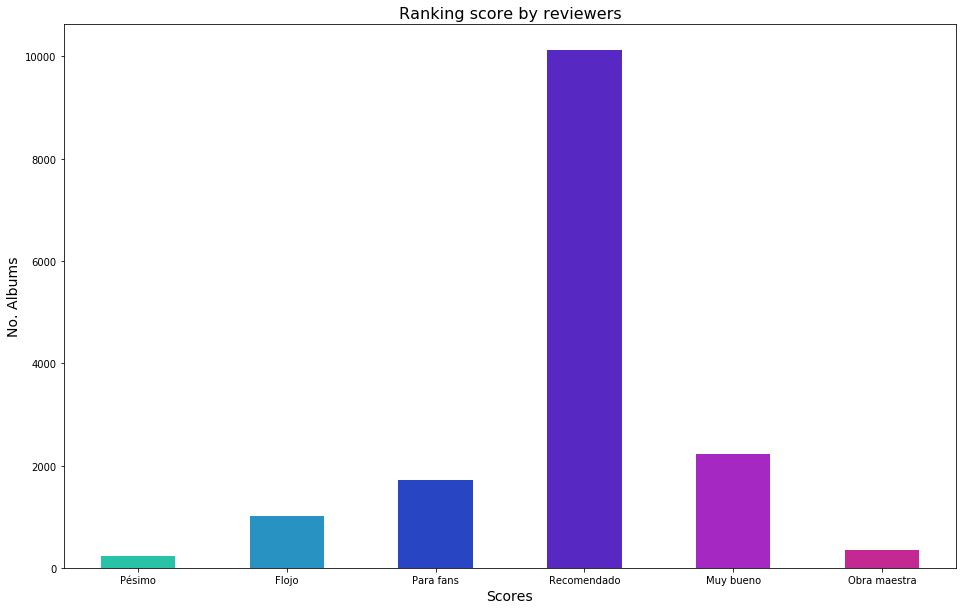

In [47]:
colors = ('#28C3A6', '#2893C3', '#2845C3', '#5828C3', '#A628C3', '#C32893')
ax = scores.plot.bar(rot=0, color=colors, figsize=(16,10))
plt.title("Ranking score by reviewers", fontsize=16)
plt.ylabel('No. Albums', fontsize=14)
plt.xlabel('Scores', fontsize=14)

ranking_score = plt.show()
ranking_score

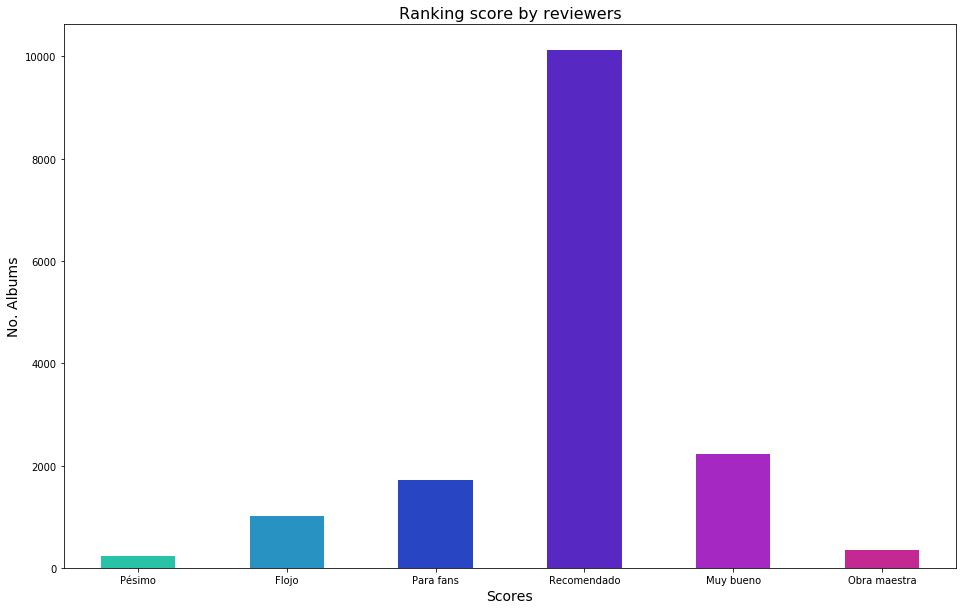

In [48]:
save_viz(ranking_score, 'rankingscore')

### Usando la función *plt_genre*, creamos un gráfico de barras para analizar los géneros preferidos por la revista Pitchfork en función las reviews con nota 10.

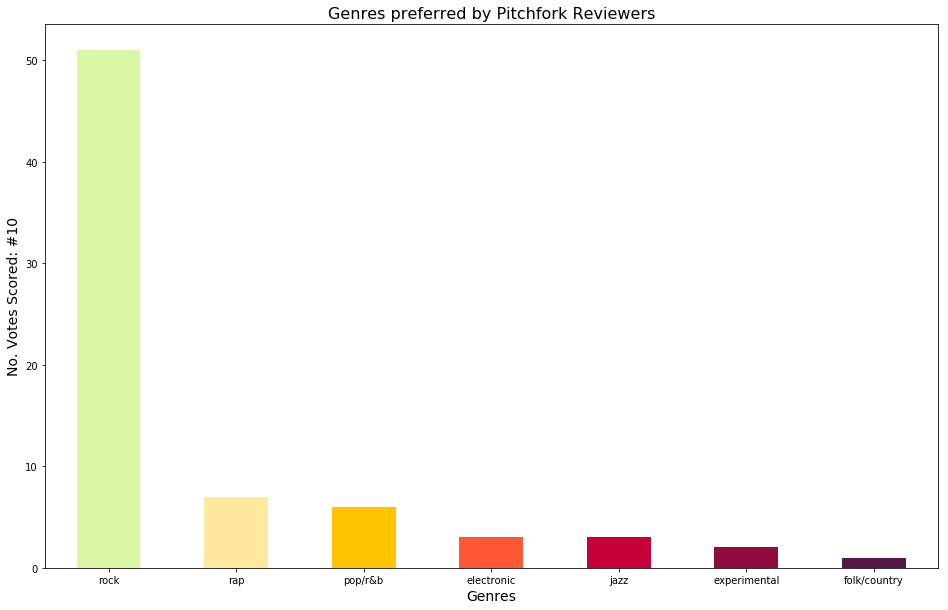

In [49]:
colors = ('#DAF7A6', '#FFE99F', '#FFC300', '#FF5733', '#C70039', '#900C3F', '#581845')
ax = loved_genres.plot.bar(rot=0, color=colors, figsize=(16,10))
plt.title("Genres preferred by Pitchfork Reviewers", fontsize=16)
plt.ylabel('No. Votes Scored: #10', fontsize=14)
plt.xlabel('Genres', fontsize=14)

genres_pref = plt.show()
genres_pref

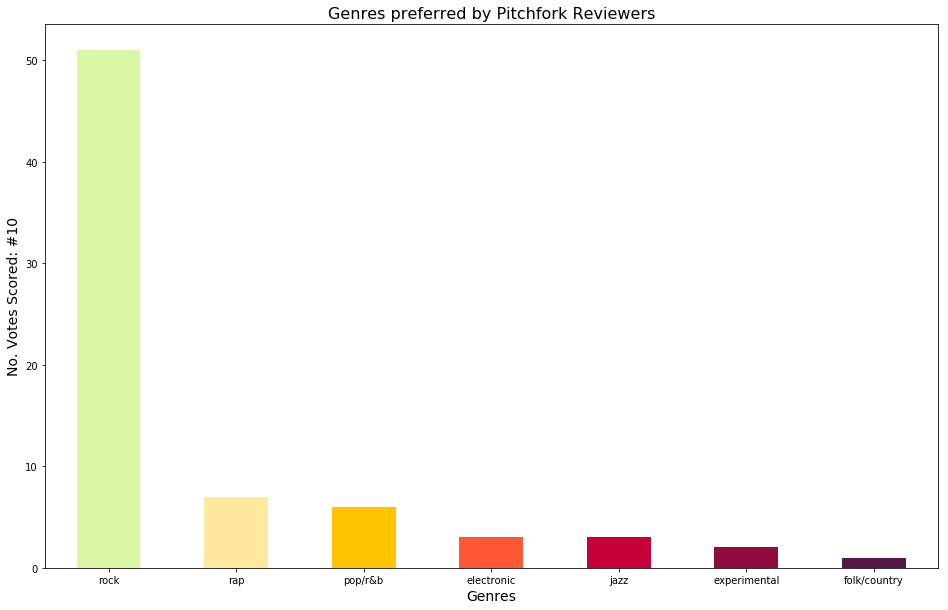

In [50]:
save_viz(genres_pref, 'genrespreferred')